# 0.0 IMPORTS


In [1]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import warnings

## 0.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False )    
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    sns.set()
    warnings.filterwarnings('ignore')

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 0.2 LOAD DATA

In [4]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


# 1.0 DATA DESCRIPT

In [5]:
df1 = df_raw.copy()
df1.isna().sum()
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


## 1.1 RENAME COLUMNS



In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
            'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


def snakecase(x): 
    return inflection.underscore(x)


cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

## 1.2 DATA DIMENSIONS


In [8]:
print(f'Number of rows {df1.shape[0]}')
print(f'Number of colunms {df1.shape[1]}')

Number of rows 1017209
Number of colunms 18


## 1.3 DATA TYPES


In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4CHECK NA


In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FILLOUT NA



In [11]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x)
                                                                else x)
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else
                                                x['competition_open_since_month'], axis=1)
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else
                                               x['competition_open_since_year'], axis=1)
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else
                                     x['promo2_since_week'], axis=1)
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else
                                     x['promo2_since_year'], axis=1)

df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['promo_interval'].fillna(0, inplace=True)
df1['is_promo'] = df1[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else
                                                             1 if x['month_map'] in x['promo_interval'].split(',') else
                                                             0, axis=1)

## 1.6 CHANGE TYPES

In [12]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(
    int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(
    int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 DESCRIPTIVE STATISTICAL

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(
    exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 NUMERICAL ATTRIBUTES

In [14]:
# CENTRAL:  TENDENCY - MEAN - MEDIAN
# DISPERSION: STD, MIN, MAX, RANGE, SKEW, KURTOSIS
num_attributes.agg(["min", "max", "mean", "median",
                   "std", "skew", "kurtosis"]).T

,min,max,mean,median,std,skew,kurtosis
store,1.000,1115.000,558.430,558.000,321.909,-0.001,-1.201
day_of_week,1.000,7.000,3.998,4.000,1.997,0.002,-1.247
sales,0.000,41551.000,5773.819,5744.000,3849.926,0.641,1.778
customers,0.000,7388.000,633.146,609.000,464.412,1.599,7.092
open,0.000,1.000,0.830,1.000,0.376,-1.758,1.091
promo,0.000,1.000,0.382,0.000,0.486,0.488,-1.762
school_holiday,0.000,1.000,0.179,0.000,0.383,1.678,0.815
competition_distance,20.000,200000.000,5935.443,2330.000,12547.653,10.242,147.790
competition_open_since_month,1.000,12.000,6.787,7.000,3.311,-0.042,-1.233
competition_open_since_year,1900.000,2015.000,2010.325,2012.000,5.516,-7.236,124.071


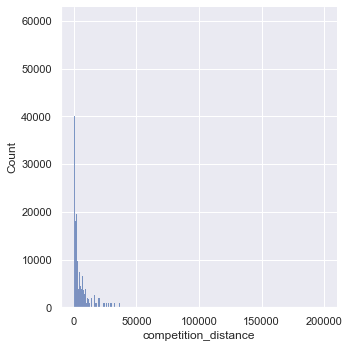

In [15]:
sns.displot(df1['competition_distance'])

### 1.7.2 CATEGORICAL ATTRIBUTES

In [16]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

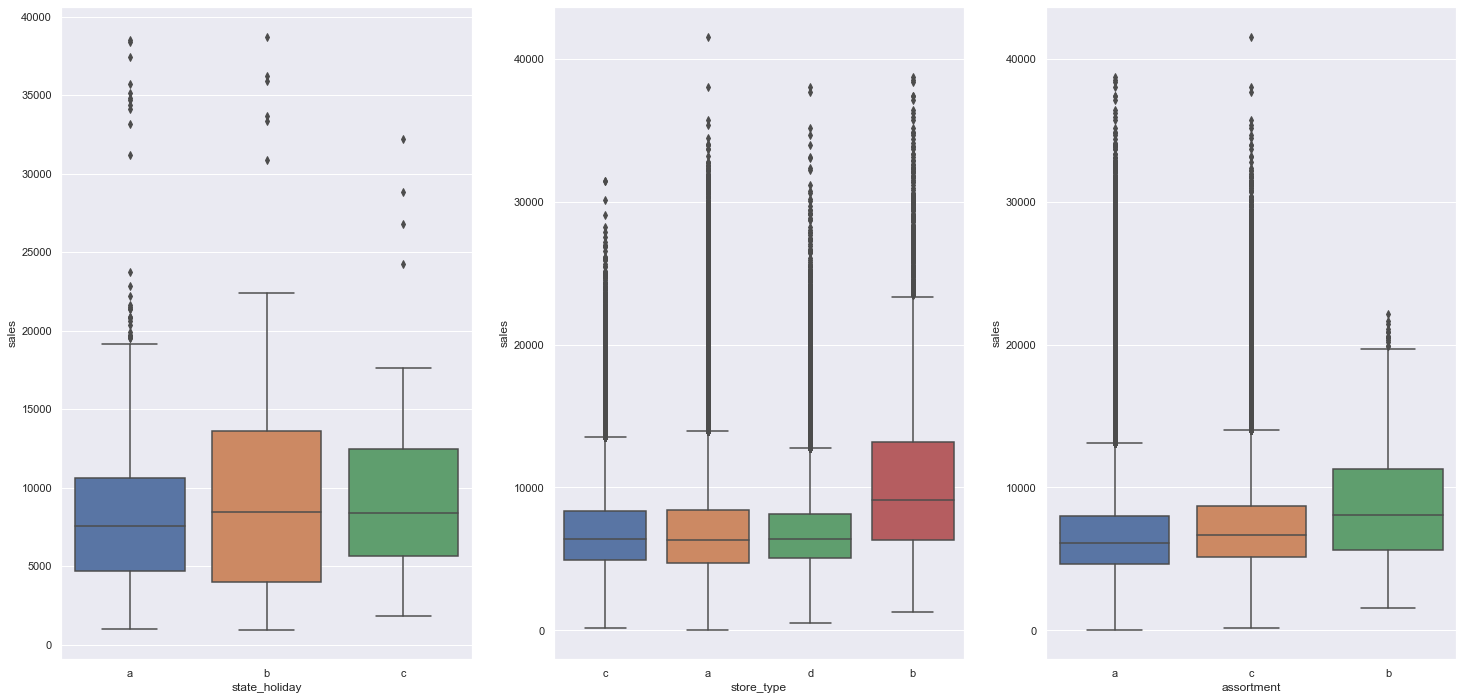

In [17]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] != 0)]
aux2 = df1[df1['sales'] != 0]
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux2)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux2)

# 2.0 FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

## 2.1 HYPOTHESIS MIND MAP


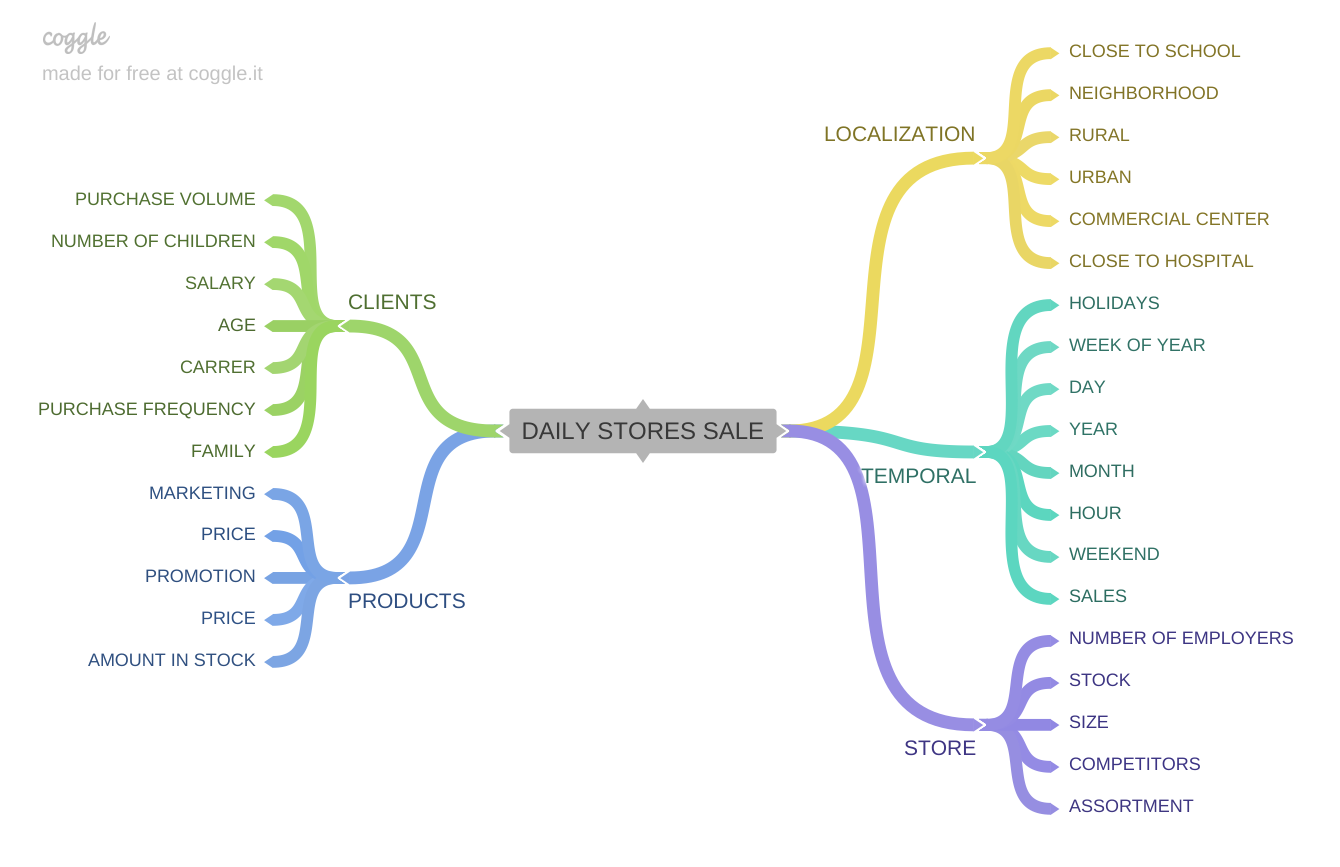

In [19]:
Image('img/DAILY_STORES_SALE.png')

## 2.2 CREATION OF HYPOTHESES

### 2.2.1 STORE HYPOTHESES

**1** Stores with more employees sell more  
**2** Stores with the most inventory sell the most  
**3** Largest stores sell more  
**4** Smaller stores sell less  
**5** Stores with the Largest Assortment Sell More  

### 2.2.2 PRODUCT HYPOTHESES

**1** Stores that invest more in marketing sell more  
**2** Stores that display more products in their windows sell more  
**3** Stores with lower prices sell more  
**4** Stores with lower prices on products for longer sell more  

### 2.2.3 TEMPORAL HYPOTHESES

**1** Stores that have holidays sell less  
**2** Stores that open in the first 6 months should sell more  
**3** Stores that open on weekends should sell more  

### 2.2.4 FINAL LIST HYPOTHESES 

**1** Stores with the Largest Assortment Sell More    
**2** Stores with close competitors should sell less    
**3** Stores with longer competitors should sell more    
**4** Stores with promotions active for longer should sell more  
**5** Stores with more days of promotions should sell more    
**6** Stores with more consecutive promotions should sell more  
**7** Stores open during the Christmas holiday should sell more  
**8** Stores should sell more over the years      
**9** Stores should sell more after the 10th of each month  
**10** Stores should sell more in the second half
**11** Stores should sell less on weekends  
**12** Stores should sell less during school holidays  
 

## 2.3 FEATURE ENGINEERING

In [20]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year of week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')
# competition since
df2['competition_since'] = df2.apply(lambda x : datetime.datetime(year = x['competition_open_since_year'] , month = x['competition_open_since_month'], day=1), axis = 1)
df2['competition_since_month'] = (df2['date']-df2['competition_since']).apply(lambda x : int((x.days)/30))
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x : datetime.datetime.strptime(x + '-1','%Y-%W-%w')) - datetime.timedelta(days = 7)
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) /7 ).apply(lambda x : x.days).astype( int )
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x : 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended') 
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x : 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christimas' if x == 'c' else 'regular_day')



In [21]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_since_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.000,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.000,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.000,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.000,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.000,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 3.0 VARIABLE FILTERING

In [22]:
df3 = df2.copy()

## 3.1 ROW SELECTION

In [23]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 COLUMNS SELECTION 

In [24]:
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(columns = cols_drop)

In [25]:
df3.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_since_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.000,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.000,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.000,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.000,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.000,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 4.0 EDA - EXPLORATORY DATA ANALYSIS

In [32]:
df4 = df3.copy()

## 4.1 UNIVARIATE ANALYSIS

### 4.1.1 RESPONSE VARIABLE

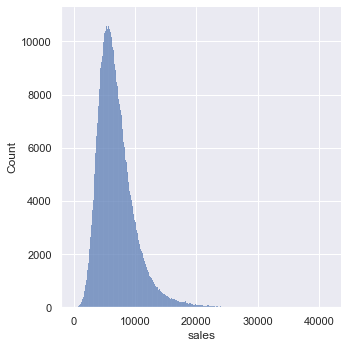

In [33]:
sns.displot(df4['sales'], kde = False);

### 4.1.2 NUMERICAL VARIABLE

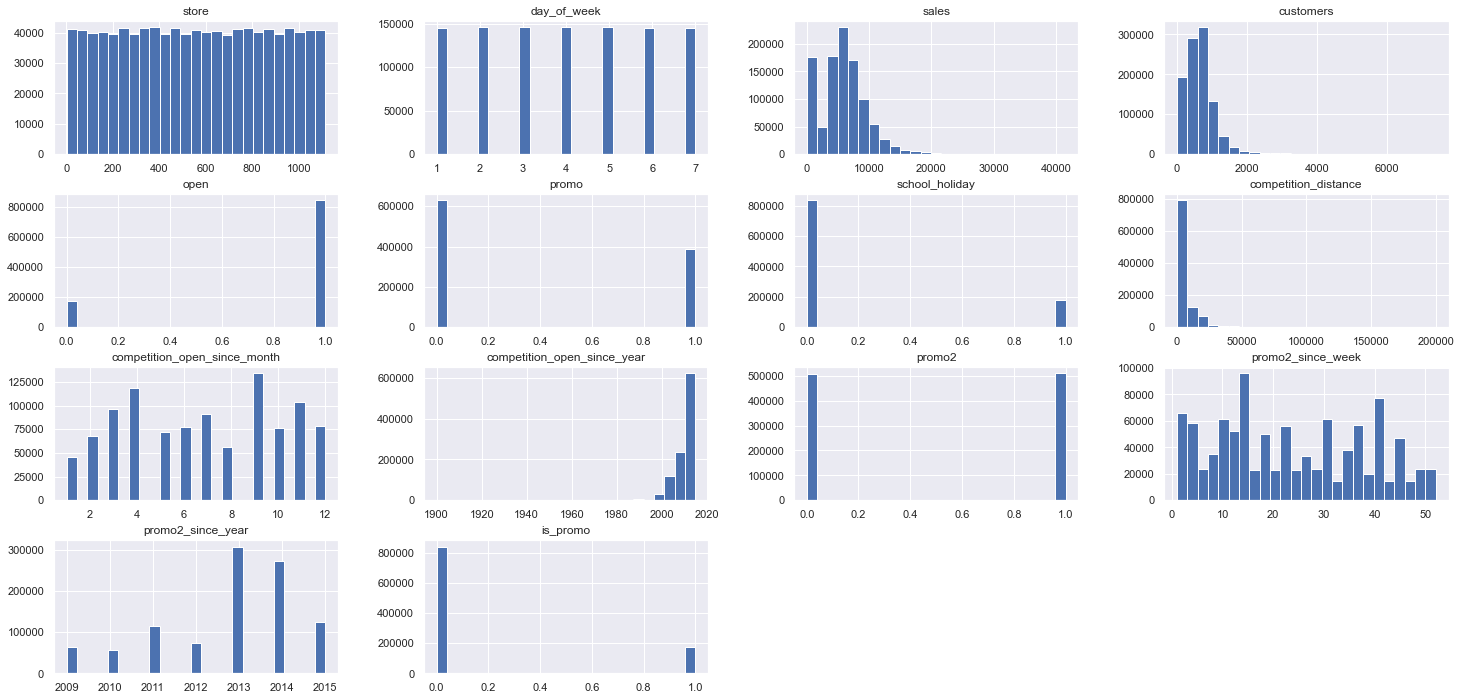

In [34]:
num_attributes.hist(bins = 25);

### 4.1.3 CATEGORICAL VARIABLE

In [35]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


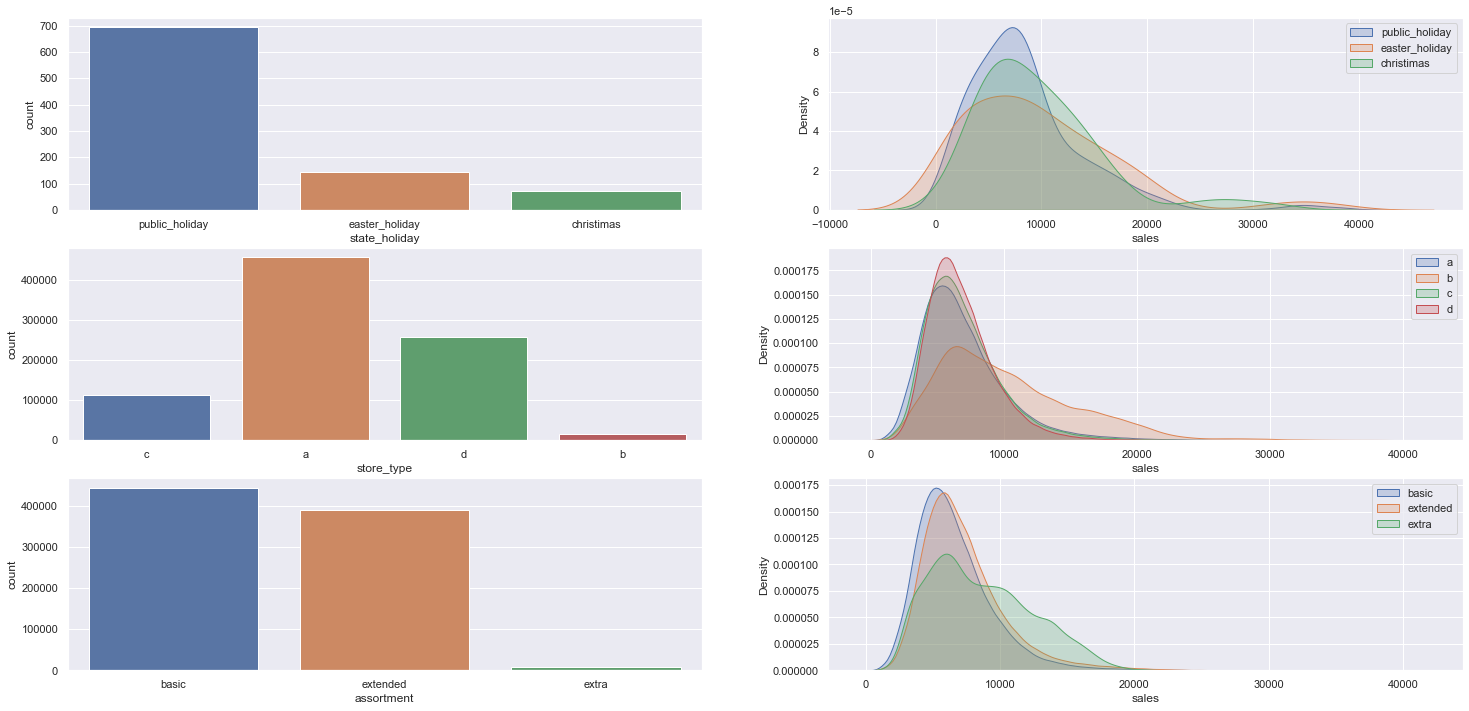

In [36]:
#state_holiday
plt.subplot(3,2,1)
sns.countplot(df4[df4['state_holiday'] != 'regular_day']['state_holiday']);
plt.subplot(3,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label = 'public_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label = 'easter_holiday', shade = True);
sns.kdeplot(df4[df4['state_holiday'] == 'christimas']['sales'], label = 'christimas', shade = True);
plt.legend()

#store_type
plt.subplot(3,2,3)
sns.countplot(df4['store_type']);
plt.subplot(3,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label = 'a', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label = 'b', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label = 'c', shade = True);
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label = 'd', shade = True);
plt.legend()

#assortment
plt.subplot(3,2,5)
sns.countplot(df4['assortment']);
plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label = 'basic', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label = 'extended', shade = True);
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label = 'extra', shade = True);
plt.legend();

## 4.2 BIVARIATE ANALYSIS

### **H1** Stores with the Largest Assortment Sell More
**FALSE** STORES WITH LARGEST ASSORTMENT SELL LESS

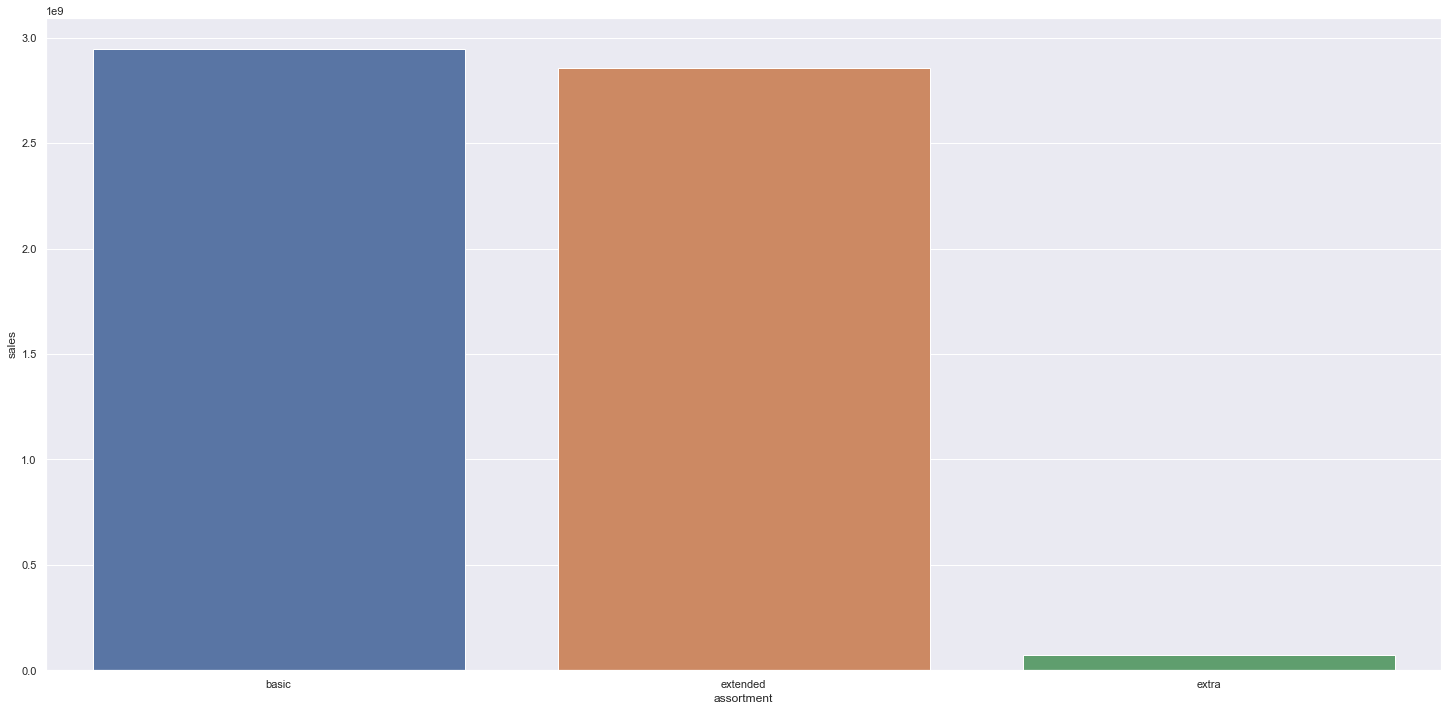

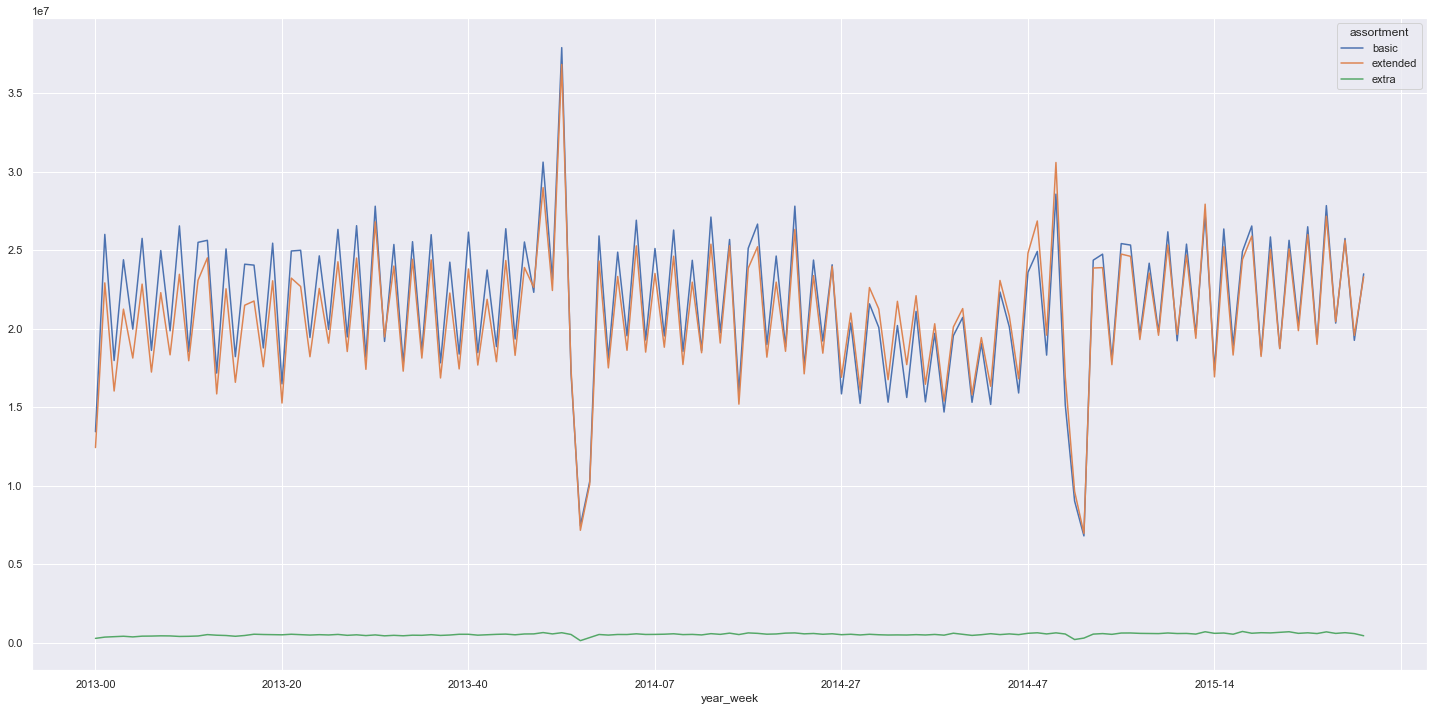

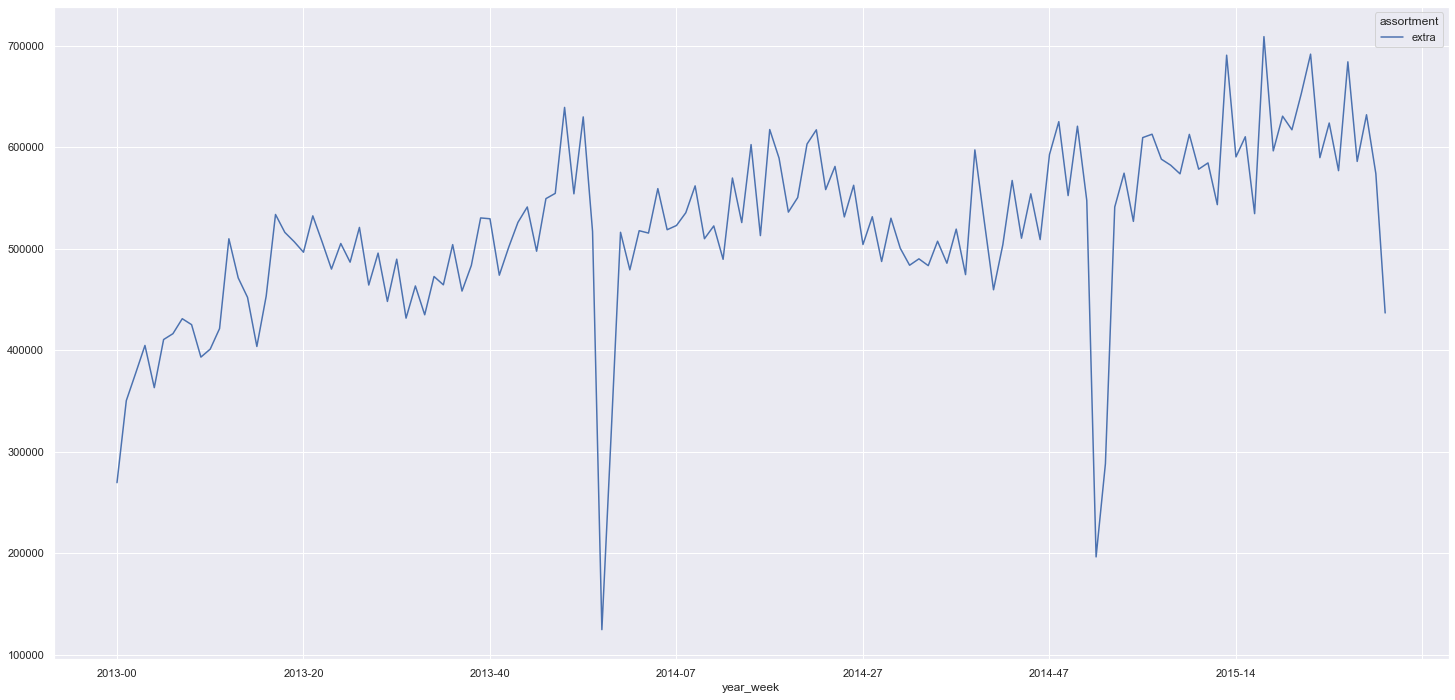

In [37]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(data = aux1, x = 'assortment', y = 'sales');
aux2 = df4[['assortment','sales','year_week']].groupby(['year_week','assortment']).sum().reset_index()
aux2.pivot(index ='year_week' ,columns = 'assortment' ,values ='sales').plot();
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot(index ='year_week' ,columns = 'assortment' ,values ='sales').plot();

### **H2** Stores with close competitors should sell less    
**FALSE** STORES WITH CLOSE COMPETITOR SELL MORE


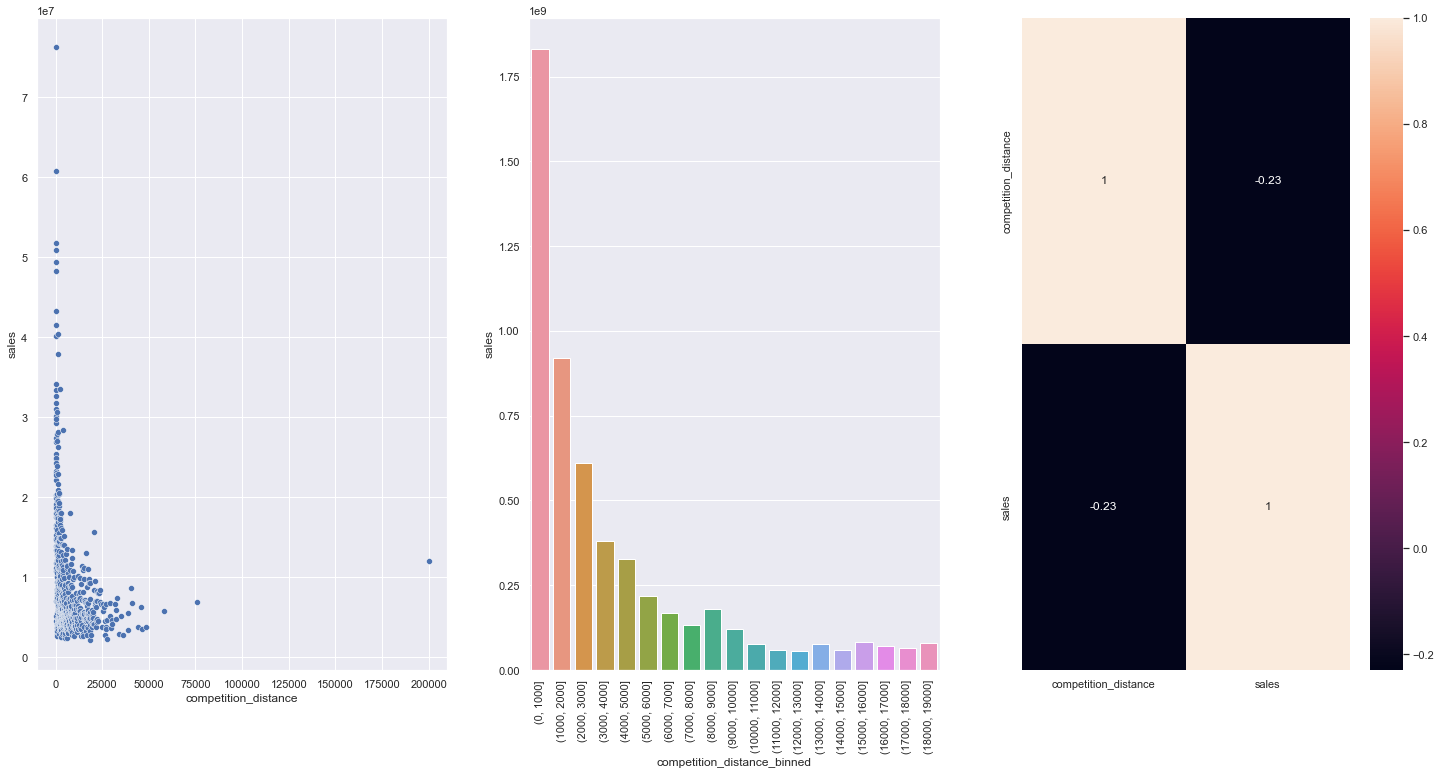

In [38]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0,20000,1000))
plt.subplot(1,3,1)
sns.scatterplot(data = aux1, x = 'competition_distance', y = 'sales');
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
plt.subplot(1,3,2)
sns.barplot(data = aux2, x = 'competition_distance_binned', y = 'sales');
plt.xticks(rotation = 90);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method= 'pearson'), annot= True);

### **H3** Stores with longer competitors should sell more    
**FALSE** Stores with longer competitors sell less

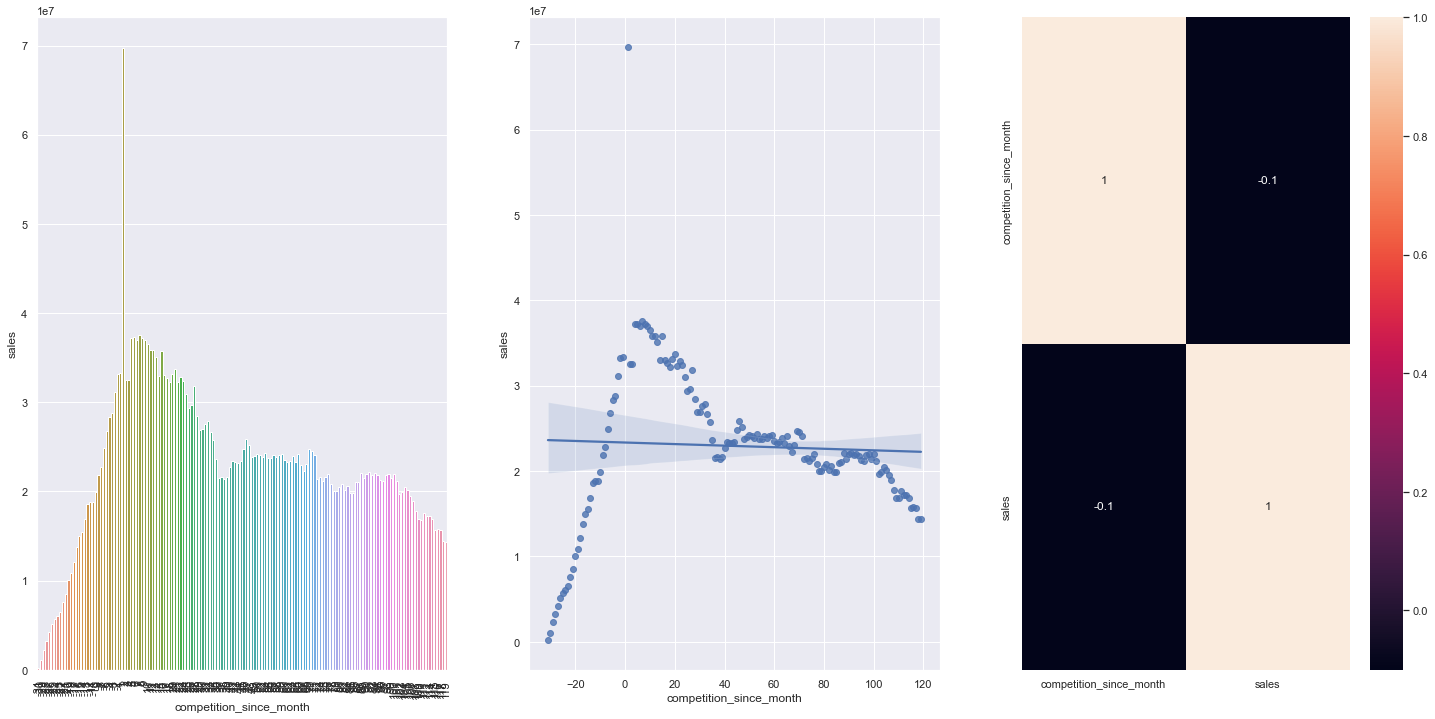

In [39]:
aux1 = df4[['competition_since_month',
              'sales']].groupby('competition_since_month').sum().reset_index()
aux2 = aux1[(aux1['competition_since_month'] < 120) & (aux1['competition_since_month'] != 0)]
plt.subplot(1,3,1);
sns.barplot(x='competition_since_month', y='sales', data=aux2);
plt.xticks(rotation=90);
plt.subplot(1,3,2)
sns.regplot(x='competition_since_month', y='sales', data=aux2);
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot= True);

### H4 Stores with promotions active for longer should sell more  
**FALSE** Stores with active promotions sell less, after a certain time

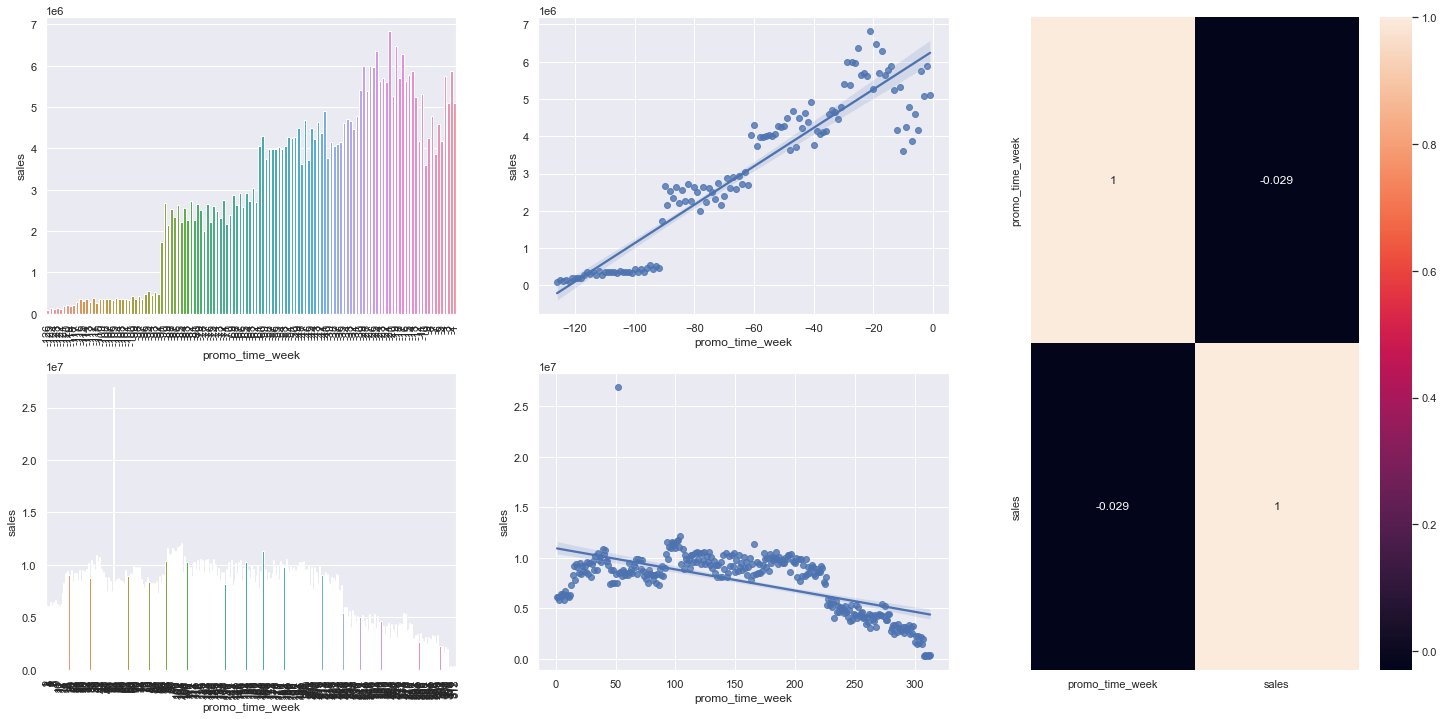

In [41]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
aux2 = aux1[aux1['promo_time_week'] > 0]
aux3 = aux1[aux1['promo_time_week'] < 0]
grid = GridSpec(2,3)
plt.subplot(grid[0,0]);
sns.barplot(x= 'promo_time_week', y = 'sales', data = aux3);
plt.xticks(rotation = 90);
plt.subplot(grid[0,1]);
sns.regplot(x= 'promo_time_week', y = 'sales', data = aux3);
plt.subplot(grid[1,0]);
sns.barplot(x= 'promo_time_week', y = 'sales', data = aux2);
plt.xticks(rotation = 90);
plt.subplot(grid[1,1]);
sns.regplot(x= 'promo_time_week', y = 'sales', data = aux2);
plt.subplot(grid[:,2])
sns.heatmap(aux1.corr(method='pearson'), annot=True);


### <s>H5 Stores with more days of promotions should sell more</s>    

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_since_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.000,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.000,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.000,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.000,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.000,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


### H6 Stores with more consecutive promotions should sell more  

In [44]:
df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


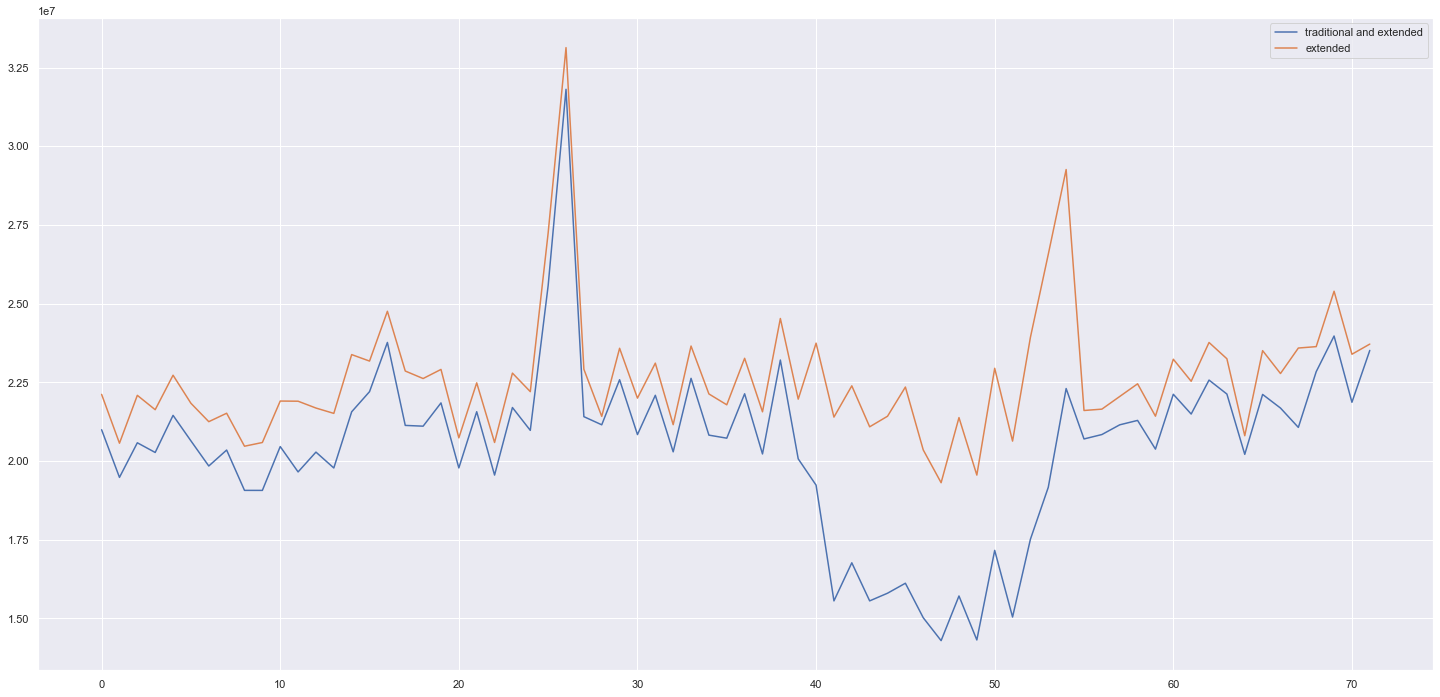

In [56]:
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot();
aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax);
ax.legend(labels = (['traditional and extended','extended']))

### H7 Stores open during the Christmas holiday should sell more  

### H8 Stores should sell more over the years      

### H9 Stores should sell more after the 10th of each month 

### H10 Stores should sell more in the second half

### H11 Stores should sell less on weekends  

### H12 Stores should sell less during school holidays  

## 4.3 MULTIVARIATE ANALYSIS

In [ ]:
aux1